# Finding the Hollywood Formula, Movie Dataset Analysis

### Project Goal: 

What is the movie formula? A statistical analysis approach  to predicting successful movie.

### Stakeholders: 
Movie directors and general public

#### Get all import libraries

In [1]:
import libraries as lib

# Planning 
See planning section of the final_report.py
https://github.com/Movie-Success-Capstone/Movie-Capstone/blob/main/Final/final_report.ipynb

# Data Acquisition

In [2]:
# Call the acquire function & cache the files locally
df = lib.fa.wrangle_df()

Using cached CSV


# Data Preparation

The following preparation process were performed on our dataset:

- 
-
-



In [3]:
# Check for overall nulls

df.isna().sum()

title                   0
success                 0
success_rating          0
genres                  2
cast_actor_1            0
cast_actor_2            0
cast_actor_3            0
total_n_cast            0
budget                  0
revenue                 0
profit_amount           0
vote_average            0
vote_count              0
production_companies    0
production_countries    0
overview                0
popularity              0
runtime                 0
profitable              0
release_date            0
imdb_id                 0
production_company      0
is_genre_adventure      0
is_genre_horror         0
is_genre_drama          0
is_genre_scifi          0
is_genre_romance        0
is_genre_thriller       0
is_genre_crime          0
is_genre_comedy         0
is_genre_animation      0
is_genre_action         0
is_genre_mystery        0
is_genre_fantasy        0
is_genre_documentary    0
release_year            0
release_month           0
release_day             0
release_week

In [4]:
# Nulls by cols 

lib.fa.nulls_by_col(df)

,percent_cols_missing,id
num_cols_missing,,
1,2.3255813953488373,2
0,0.0,6891


In [5]:
# Nulls by rows 

lib.fa.nulls_by_row(df)

,num_rows_missing,percent_rows_missing
genres,2.0,0.0
title,0.0,0.0
is_genre_mystery,0.0,0.0
is_genre_drama,0.0,0.0
is_genre_scifi,0.0,0.0
is_genre_romance,0.0,0.0
is_genre_thriller,0.0,0.0
is_genre_crime,0.0,0.0
is_genre_comedy,0.0,0.0
is_genre_animation,0.0,0.0


In [6]:
# Examine the nulls in the genres columns

df.genres.isna().value_counts()

False    6891
True        2
Name: genres, dtype: int64

In [7]:
# Drop the 2 rows missing values in the genres column

df = df.dropna(subset=['genres'])

In [8]:
# Examine the nulls again in the genres columns

df.genres.isna().value_counts()

False    6891
Name: genres, dtype: int64

In [9]:
# Dataframe display

df.head(3)

,title,success,success_rating,genres,cast_actor_1,cast_actor_2,cast_actor_3,total_n_cast,budget,revenue,profit_amount,vote_average,vote_count,production_companies,production_countries,overview,popularity,runtime,profitable,release_date,imdb_id,production_company,is_genre_adventure,is_genre_horror,is_genre_drama,is_genre_scifi,is_genre_romance,is_genre_thriller,is_genre_crime,is_genre_comedy,is_genre_animation,is_genre_action,is_genre_mystery,is_genre_fantasy,is_genre_documentary,release_year,release_month,release_day,release_weekday,is_long_movie,ROI,returns,budget_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,Four Rooms,0,3.493750,Crime Comedy,Tim Roth,Antonio Banderas,Jennifer Beals,24.0,4000000.0,4300000.0,300000.0,6.5,539.0,MiramaxFilms ABandApart,UnitedStatesofAmerica,It's Ted the Bellhop'...,9.026586,98.0,0,1995-12-09,tt0113101,MiramaxFilms,0,0,0,0,0,0,1,1,0,0,0,0,0,1995,12,9,Saturday,0,1.075000,avg,low
6,Judgment Night,0,3.883820,Action Thriller Crime,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,15.0,10000000.0,12136938.0,2136938.0,6.4,79.0,UniversalPictures Lar...,Japan UnitedStatesofA...,While racing to a box...,5.538671,110.0,0,1993-10-15,tt0107286,UniversalPictures,0,0,0,0,0,1,1,0,0,1,0,0,0,1993,10,15,Friday,0,1.213694,avg,low
11,Star Wars,1,285.487448,Adventure Action Scie...,Mark Hamill,Harrison Ford,Carrie Fisher,106.0,11000000.0,775398007.0,764398007.0,8.1,6778.0,Lucasfilm TwentiethCe...,UnitedStatesofAmerica,Princess Leia is capt...,42.149697,121.0,1,1977-05-25,tt0076759,Lucasfilm,1,0,0,1,0,0,0,0,0,1,0,0,0,1977,5,25,Wednesday,1,70.490728,very high,avg


In [10]:
df.shape

(6891, 43)

In [11]:
# # split each movie's genre list, then form a set from the unwrapped list of all genres
# categories = set([s for genre_list in df.genres.unique() for s in genre_list.split("|")])

# # one-hot encode each movie's classification
# for cat in categories:
#     df[cat] = df.genres.transform(lambda s: int(cat in s))
# # drop other columns
# df = df[['director_name','genres','duration'] + list(categories)]
# df.head()

In [12]:
# Create time series columns (month, year, day)

# Make release year a datetime format
df.release_date = lib.pd.to_datetime(df.release_date)


# # Feature engineer columns 
# df['release_year'] = df.release_date.dt.year
# df['release_month'] = df.release_date.dt.month
# df['release_day'] = df.release_date.dt.day
# df['release_weekday'] = df.release_date.dt.day_name()
# # Long movie = any movie with runtime > 120 mins
# df['is_long_movie'] = df.runtime.transform(lambda x: int(x > 120)) 
# df['ROI'] = df.revenue / df.budget

### Split the data into train, validate, test

In [13]:
# Spit dataframe into train, validate & test

train, validate, test = lib.fa.train_validate_test_split(df)
train.shape, validate.shape, test.shape

((3858, 43), (1654, 43), (1379, 43))

## Explore

With the project goal in consideration, the project asks the following initial questions to guide our understanding of the features and their correlations. 

### Initial Questions:
- 1. Is there a relationship between budget and profit?
- 2. What are the top 5 highest voted movies?
- 3. Top 5 Movies with the largest return on investment(ROI)?
- 4. Which top 5 genres have the lease return on investment(ROI)?
- 5. Are there production studios that are more likely to succeed than others?
- 6. What are the drivers for less successive movies categories?
- 7. Is there a correlations between runtime for successful movies vs unsuccessful movies
- 8. Are long movies (runtime > 120 min) likely to have more success than short movies 
- 9. Which release months, days are movies likely to be successful?
- 10. Is there a relationship of profit amount with release month and day of the week?
 

In [14]:
# Set visualizations default colors

bar_color = 'chocolate'
background_color = 'bar_color'

> ## (a). Univariate Exploration

In [15]:
# Target variable mean

print(f'Overall success mean {(train.success.mean()) * 100}')

Overall success mean 38.25816485225506


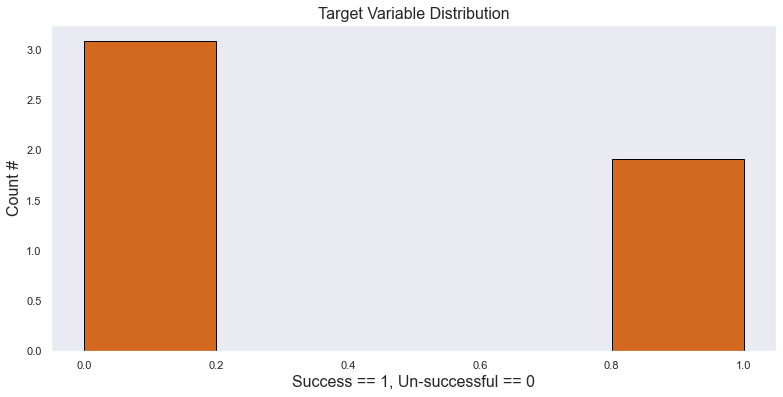

In [16]:
# Target variable 

train.success.hist(grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density=True, 
                   bins = 5,
                   facecolor = bar_color)
lib.plt.title('Target Variable Distribution', size = 16)
lib.plt.xlabel('Success == 1, Un-successful == 0', size = 16)
lib.plt.ylabel('Count #', size = 16)
lib.plt.show()


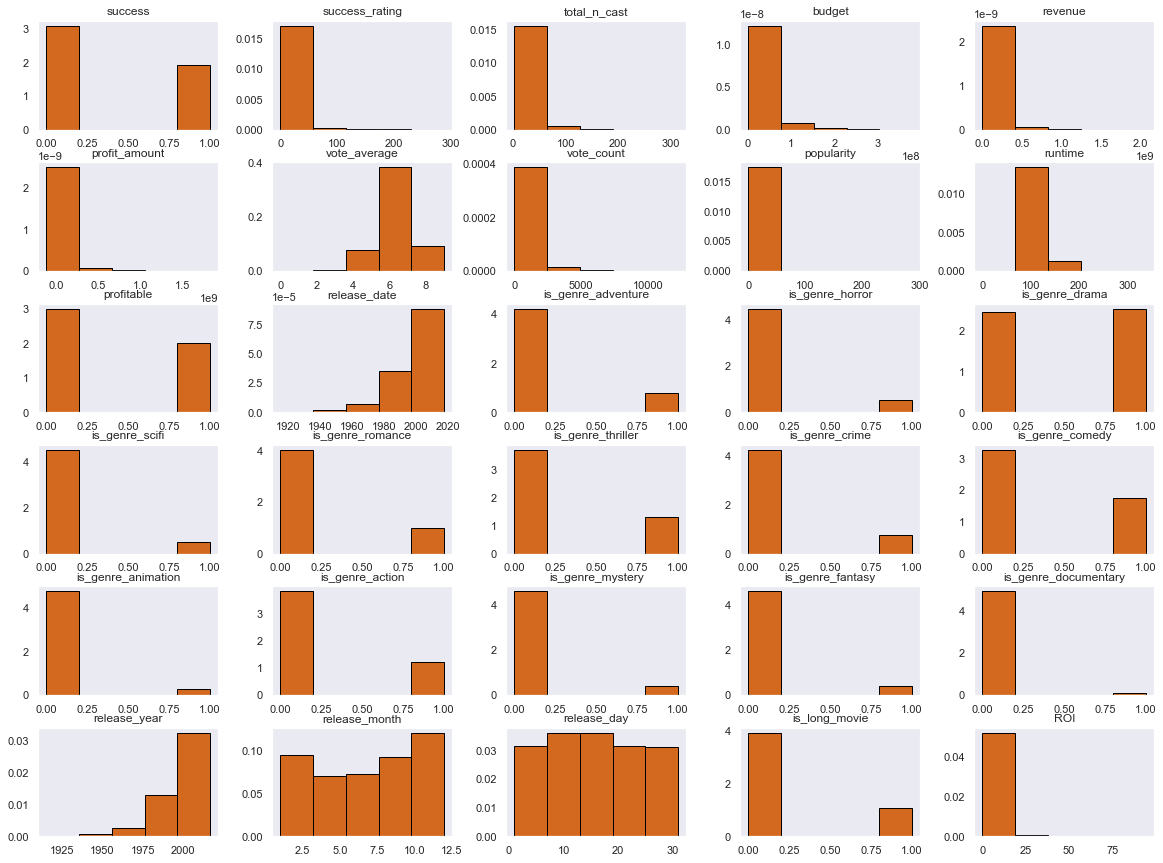

In [17]:
# Other univariate features

train.hist(figsize = (20, 15), grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density=True, 
                   bins = 5,
                   facecolor = bar_color)
lib.plt.show()

In [18]:
# Mean average for all successful movies

success_movies_subset = train[train.success == 1]
success_movies_subset.mean()

success                 1.000000e+00
success_rating          2.109804e+01
total_n_cast            2.701626e+01
budget                  3.289935e+07
revenue                 1.488686e+08
profit_amount           1.159692e+08
vote_average            6.565176e+00
vote_count              1.115650e+03
popularity              1.203245e+01
runtime                 1.126287e+02
profitable              9.769648e-01
is_genre_adventure      1.937669e-01
is_genre_horror         1.050136e-01
is_genre_drama          4.586721e-01
is_genre_scifi          1.023035e-01
is_genre_romance        2.032520e-01
is_genre_thriller       2.682927e-01
is_genre_crime          1.578591e-01
is_genre_comedy         3.617886e-01
is_genre_animation      6.571816e-02
is_genre_action         2.608401e-01
is_genre_mystery        7.791328e-02
is_genre_fantasy        9.620596e-02
is_genre_documentary    7.452575e-03
release_year            1.997721e+03
release_month           7.117209e+00
release_day             1.588550e+01
i

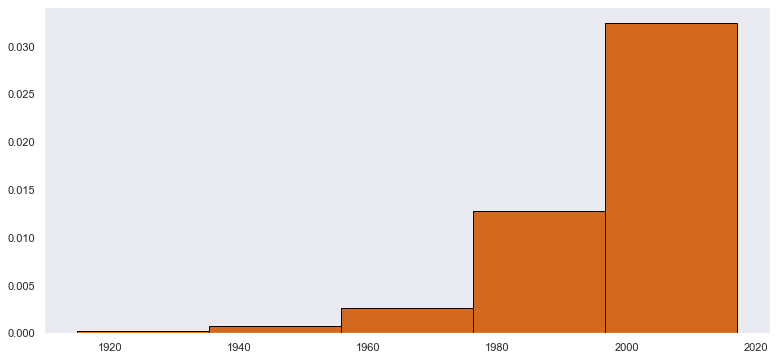

In [19]:
# Overall successful movies overtime

train.release_year.hist(grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density = True, 
                   bins = 5,
                   facecolor = bar_color)
lib.plt.show()

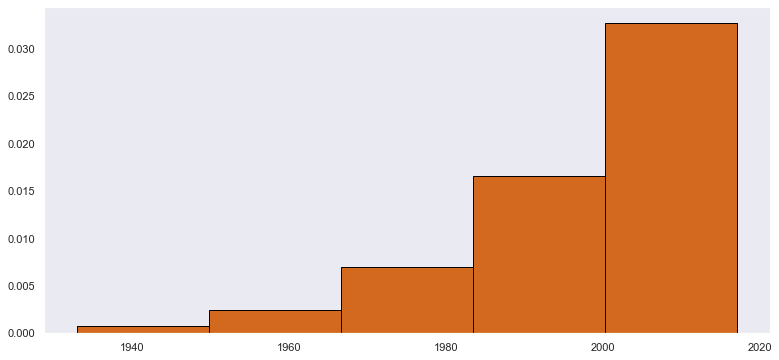

In [20]:
# Successful movies by year

success_movies_subset.release_year.hist(grid = False, 
                   cumulative= False, 
                   edgecolor = 'black', 
                   fill = True,
                   density=True, 
                   bins = 5,
                   facecolor = bar_color)
lib.plt.show()

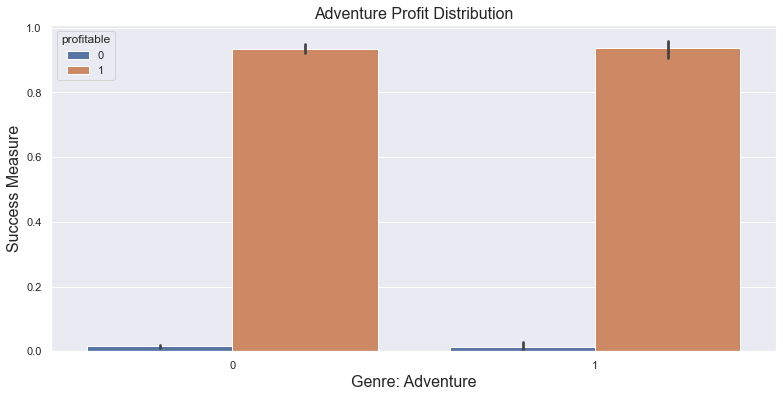

In [21]:
# Profits by adventure genre

ax = lib.sns.barplot(x="is_genre_adventure", 
                     y = 'success', 
                     data=train, 
                     hue = 'profitable')
lib.plt.title('Adventure Profit Distribution', size = 16)
lib.plt.xlabel('Genre: Adventure', size = 16)
lib.plt.ylabel('Success Measure', size = 16)
lib.plt.show()

In [22]:
# Create list of genres

genres_list = ['is_genre_adventure',
              'is_genre_horror',
               'is_genre_drama',
               'is_genre_scifi',
               'is_genre_romance',
               'is_genre_thriller',
               'is_genre_crime',
               'is_genre_comedy',
               'is_genre_animation',
               'is_genre_action',
               'is_genre_mystery',
               'is_genre_fantasy',
               'is_genre_documentary']

### Univariate takeaways

- 38.9% of movies in the dataset succeeded and 61.1% less likely to succeed
- Vote average and runtime appears normally distributed

> ## (b). Bi-variate Exploration

### 1.  Is there a relationship between budget and profit?


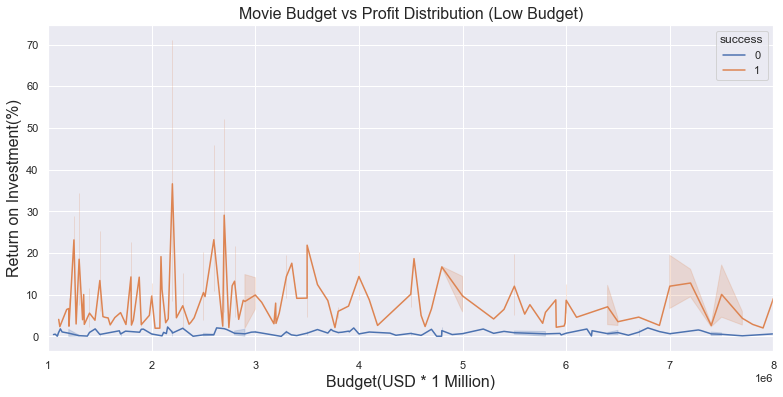

In [23]:
# Budget vs profit relationship

ax = lib.sns.lineplot(data = train, 
                x = 'budget', 
                y = 'ROI', 
                hue='success')
lib.plt.title('Movie Budget vs Profit Distribution (Low Budget)', size = 16)
lib.plt.xlabel('Budget(USD * 1 Million)', size = 16)
lib.plt.ylabel('Return on Investment(%)', size = 16)
lib.plt.xlim(1_000_000, 8_000_000)
lib.plt.show()

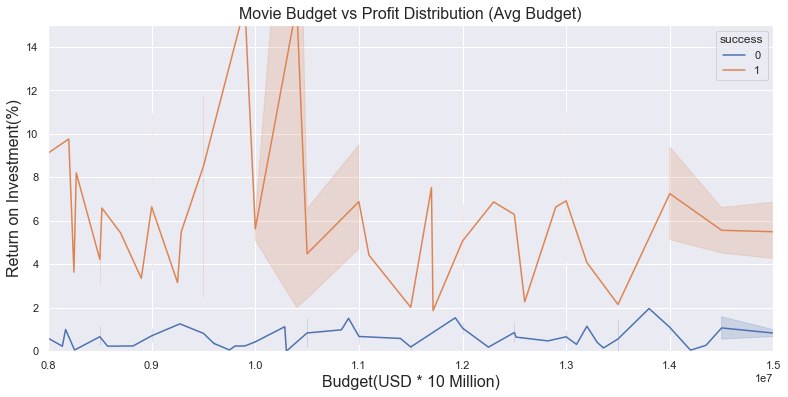

In [24]:
# Budget vs profit relationship

ax = lib.sns.lineplot(data = train, 
                x = 'budget', 
                y = 'ROI', 
                hue='success')
lib.plt.title('Movie Budget vs Profit Distribution (Avg Budget)', size = 16)
lib.plt.xlabel('Budget(USD * 10 Million)', size = 16)
lib.plt.ylabel('Return on Investment(%)', size = 16)
lib.plt.ylim(0,15 )
lib.plt.xlim(8_000_000, 15_000_000)
lib.plt.show()

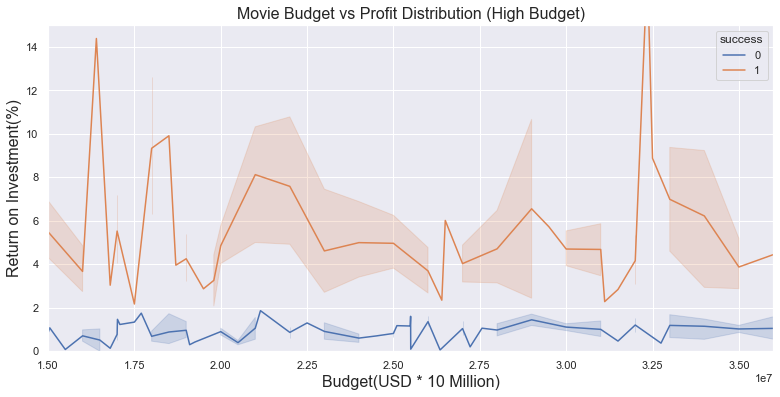

In [25]:
# Budget vs profit relationship

ax = lib.sns.lineplot(data = train, 
                x = 'budget', 
                y = 'ROI', 
                hue='success')
lib.plt.title('Movie Budget vs Profit Distribution (High Budget)', size = 16)
lib.plt.xlabel('Budget(USD * 10 Million)', size = 16)
lib.plt.ylabel('Return on Investment(%)', size = 16)
lib.plt.ylim(0,15 )
lib.plt.xlim(15_000_000, 36_000_000)
lib.plt.show()

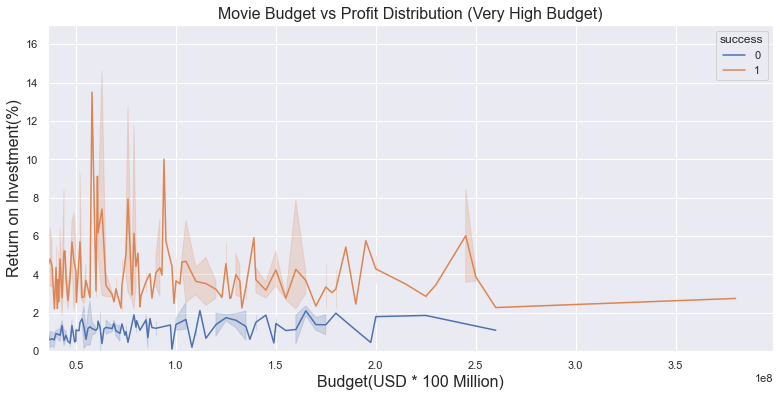

In [26]:
# Budget vs profit relationship

ax = lib.sns.lineplot(data = train, 
                x = 'budget', 
                y = 'ROI', 
                hue='success')
lib.plt.title('Movie Budget vs Profit Distribution (Very High Budget)', size = 16)
lib.plt.xlabel('Budget(USD * 100 Million)', size = 16)
lib.plt.ylabel('Return on Investment(%)', size = 16)
lib.plt.ylim(0,17 )
lib.plt.xlim(36_000_000, )
lib.plt.show()

__Interpretation:__ For movies with budget slightly above 3 million, return on investment appears  

### 2. What are the top 5 highest voted movies?

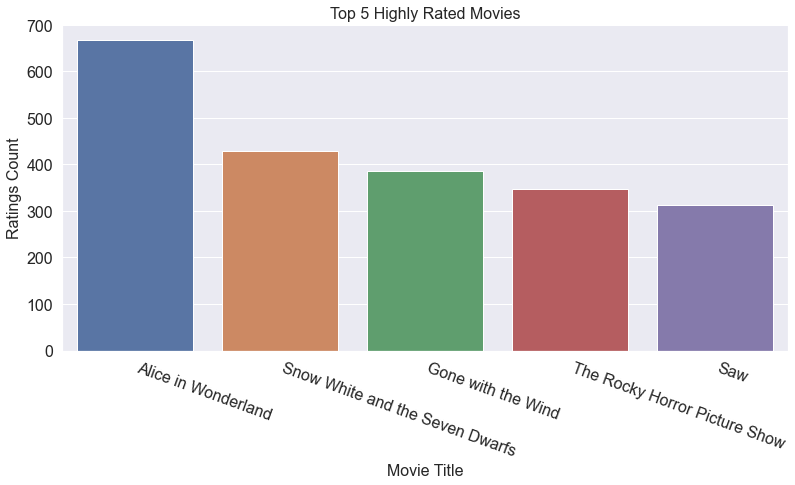

In [27]:
# 5 Highly rated movies
cols = ['title', 'success_rating']
movie_ratings_df = df.sort_values('success_rating', ascending = False)[cols].set_index('title')

# Create top five movies objects
top_5 = movie_ratings_df.head(5)

# Plot the plots 
lib.sns.barplot(data = top_5, x = top_5.index, y = 'success_rating');
lib.plt.xticks(ha = 'left', rotation = -20, fontsize = 16); lib.plt.yticks(fontsize = 16)
lib.plt.title('Top 5 Highly Rated Movies', fontsize = 16)
lib.plt.ylabel('Ratings Count', size = 16)
lib.plt.xlabel('Movie Title', size = 16)
lib.plt.show()

__Interpretation:__ Highly rated movie is the Alice in the Wonderland. This is received almost twice the ratings amount than the fifth movie

### 2. What are the least 5 rated movies?

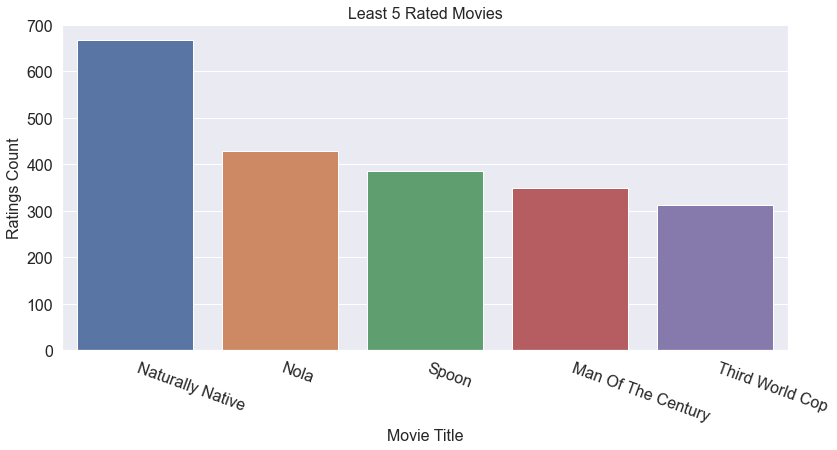

In [28]:
# Bottom 5 least voted movies
cols = ['title', 'success_rating']
movie_ratings_df = df.sort_values('success_rating', ascending = False)[cols].set_index('title')

# Create bottom 5 object
bottom_5 = movie_ratings_df.tail(5)

# Plot the visuals 
lib.sns.barplot(data = top_5, 
                x = bottom_5.index, 
                y = 'success_rating');

lib.plt.xticks(ha = 'left', rotation = -20, fontsize = 16); lib.plt.yticks(fontsize = 16)
lib.plt.title('Least 5 Rated Movies', fontsize = 16)
lib.plt.ylabel('Ratings Count', size = 16)
lib.plt.xlabel('Movie Title', size = 16)
lib.plt.show()

__Interpretation:__ Overall, least rated movie is the "Teddy Bear's Picnic"

### 3. Top 5 Movies with the largest Return On Investment(ROI)?

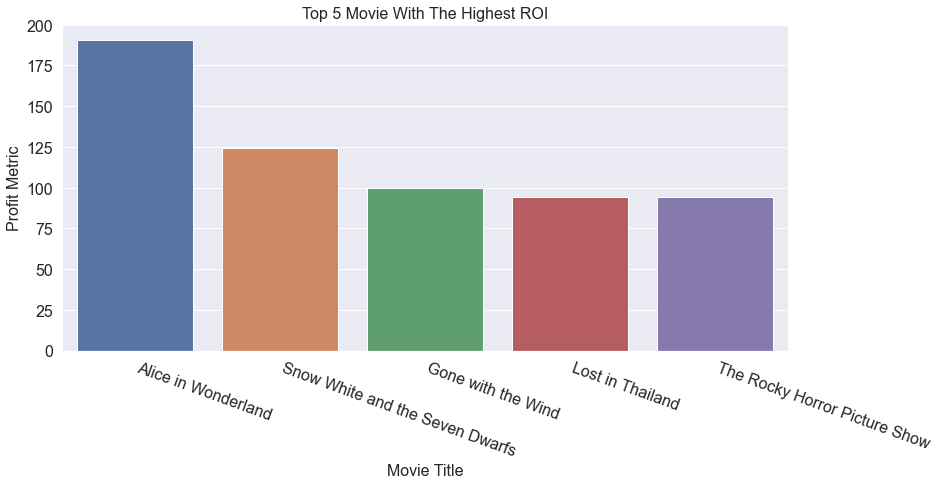

In [29]:
# Top 5 least profitable movies
cols = ['title', 'ROI']

revenue_df = df.sort_values('ROI', ascending=False)[cols].set_index('title')

# Create bottom 5 object
top_5 = revenue_df.head(5)

# Plot the visuals 
lib.sns.barplot(data = top_5, x = top_5.index, y = 'ROI');
lib.plt.xticks(ha = 'left', rotation = -20, fontsize = 16); lib.plt.yticks(fontsize = 16)
lib.plt.title('Top 5 Movie With The Highest ROI', fontsize = 16)
lib.plt.ylabel('Profit Metric', size = 16)
lib.plt.xlabel('Movie Title', size = 16)
lib.plt.show()

__Interpretation:__ `Alice in the Wonderland` is the most successful movie in this exploration. Follow up questions:
 - Why is `Alice in the Wonderland` more successful than all the other movies? 
 - What genres are these successful movies in?

### 4. Which  5 genres have the least return on investment(ROI)?

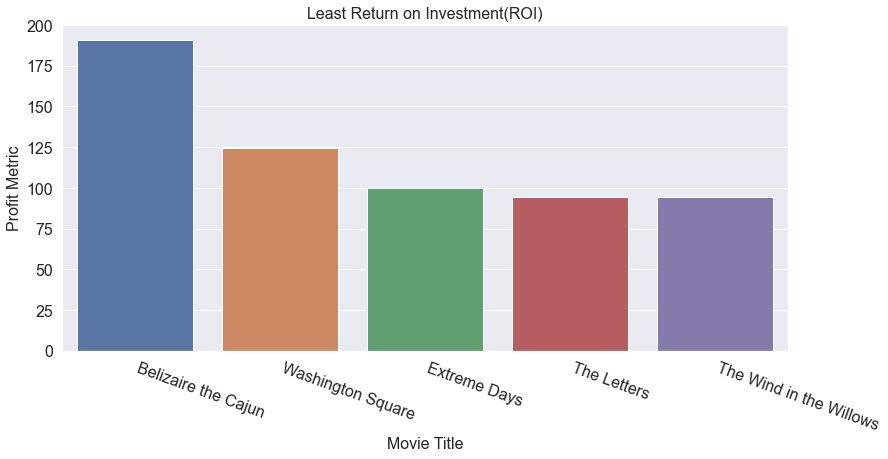

In [30]:
# Bottom 5 least profitable movies
cols = ['title', 'ROI']
movie_ratings_df = df.sort_values('ROI', ascending = False)[cols].set_index('title')

# Create bottom 5 object
bottom_5 = movie_ratings_df.tail(5)

# Plot the visuals 
lib.sns.barplot(data = top_5, 
                x = bottom_5.index, 
                y = 'ROI');

lib.plt.xticks(ha = 'left', rotation = -20, fontsize = 16); lib.plt.yticks(fontsize = 16)
lib.plt.title('Least Return on Investment(ROI)', fontsize = 16)
lib.plt.ylabel('Profit Metric', size = 16)
lib.plt.xlabel('Movie Title', size = 16)
lib.plt.show()

__Interpretation:__ Least profitable movie is the `Belizaire the Cajun`.

### 6. Which top 5 genres have the highest profit?

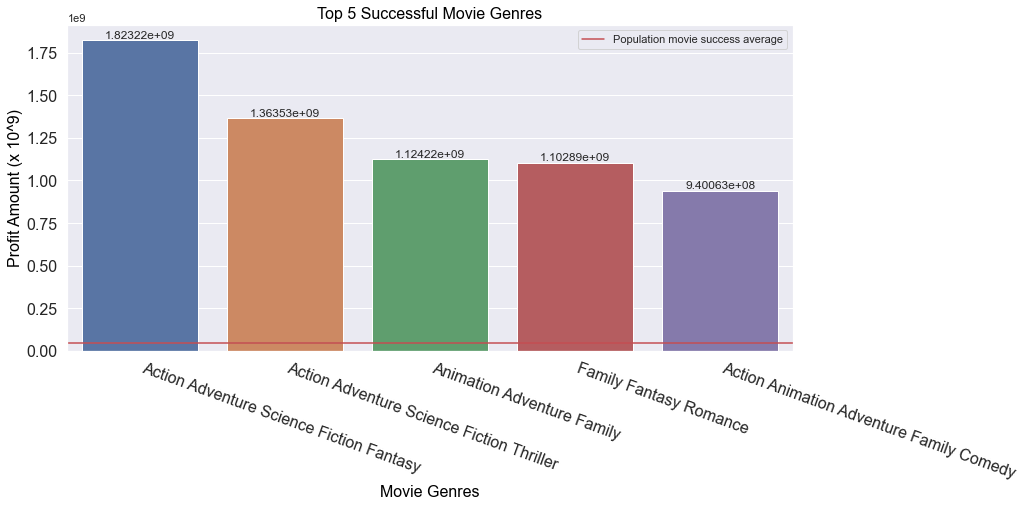

In [31]:
# Create top 5 most profitable subset
top_5_most_profitable_movies = train.nlargest(n = 5, columns = ['profit_amount'])


lib.plt.title('Top 5 Successful Movie Genres', c = 'black', size = 16)

ax = lib.sns.barplot(x = 'genres',  y = 'profit_amount', data = top_5_most_profitable_movies)

ax.bar_label(ax.containers[0])  
overall_movie_profit_mean = df.profit_amount.mean()
lib.plt.xticks(ha = 'left', rotation = -20, fontsize = 16); lib.plt.yticks(fontsize = 16)
lib.plt.axhline(overall_movie_profit_mean, label="Population movie success average", color = 'r')
lib.plt.ylabel('Profit Amount (x 10^9)', c = 'black', size = 16)
lib.plt.xlabel('Movie Genres', c = 'black', size = 16)
lib.plt.legend()
lib.plt.show()

__Interpretation:__ Genres needs a little more data cleaning....

### 7. Which are the least 5 genres have the lowest profit?

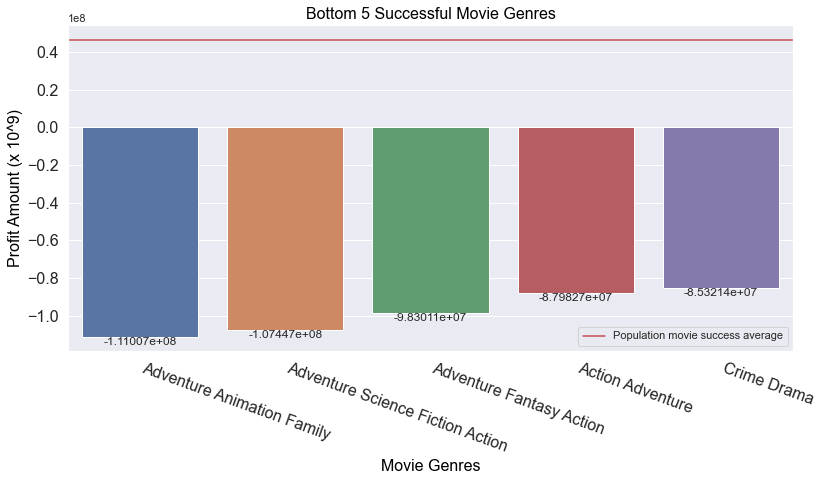

In [32]:
# Create top 5 most profitable subset
bottom_5_most_profitable_movies = train.nsmallest(n = 5, columns = ['profit_amount'])

lib.plt.title('Bottom 5 Successful Movie Genres', c = 'black', size = 16)

ax = lib.sns.barplot(x = 'genres',  y = 'profit_amount', data = bottom_5_most_profitable_movies)

ax.bar_label(ax.containers[0])  
overall_movie_profit_mean = df.profit_amount.mean()
lib.plt.xticks(ha = 'left', rotation = -20, fontsize = 16); lib.plt.yticks(fontsize = 16)
lib.plt.axhline(overall_movie_profit_mean, label="Population movie success average", color = 'r')
lib.plt.ylabel('Profit Amount (x 10^9)', c = 'black', size = 16)
lib.plt.xlabel('Movie Genres', c = 'black', size = 16)

lib.plt.legend()
lib.plt.show()

__Interpretation:__ Movies genres need a little of some cleaning....

### 8. Are there production studios that are more likely to succeed than others?


In [33]:
print(f'Number of unique production companies: {train.production_company.nunique()}')

Number of unique production companies: 1289


In [34]:
# train['production_company'].hist(density=True, histtype='bar')
# lib.plt.xticks(ha = 'left', rotation = -20, fontsize = 16); lib.plt.yticks(fontsize = 16)

# None

In [35]:
# Percentile success by production country

train.groupby(['production_countries']).success.quantile().sort_values(ascending = False)

production_countries
Italy Japan UnitedStatesofAmerica                                               1.0
China Germany UnitedKingdom UnitedStatesofAmerica                               1.0
Mexico SouthAfrica UnitedStatesofAmerica                                        1.0
CzechRepublic UnitedKingdom                                                     1.0
UnitedKingdom HongKong China                                                    1.0
Germany UnitedKingdom UnitedStatesofAmerica Belgium Denmark                     1.0
Malaysia India                                                                  1.0
UnitedKingdom Japan UnitedStatesofAmerica                                       1.0
China UnitedStatesofAmerica                                                     1.0
UnitedKingdom Luxembourg                                                        1.0
China Thailand                                                                  1.0
Greece UnitedStatesofAmerica                           

In [36]:
us_production_companies = train[train.production_countries == 'UnitedStatesofAmerica']

us_production_companies.groupby('production_countries').success.mean()

production_countries
UnitedStatesofAmerica    0.418855
Name: success, dtype: float64

__Interpretation:__ 
- There are 1316 unique production companies
- Production countries needs a little more data prepation 

### 9. What are the drivers for less successive movies categories?


In [37]:
# Get least successive movie subset

cols = ['vote_average','profit_amount',
        'vote_count','total_n_cast',
        'budget','revenue','popularity',
        'runtime','profitable',
        'release_year','is_genre_adventure',
        'is_genre_horror','is_genre_drama',
        'is_genre_scifi','is_genre_romance',
        'is_genre_thriller','is_genre_crime',
        'is_genre_comedy','is_genre_animation',
        'is_genre_action','is_genre_mystery',
        'is_genre_fantasy','is_genre_documentary',
        'release_month','release_day',
        'is_long_movie','ROI']

X_train = train[cols]
Y_train = train.success

X_validate = validate[cols]
Y_validate = validate.success

X_validate = test[cols]
Y_validate = test.success

> #### Using SelectKBest to find drivers for success

In [38]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SequentialFeatureSelector

## SelectKBest lib' already imported above. continuing....

f_selector = SelectKBest(f_regression, k = 8)

f_selector.fit(X_train, Y_train)

feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()
print(f'Key drivers for successful movies:\n\n {f_feature}')

Key drivers for successful movies:

 ['vote_average', 'profit_amount', 'vote_count', 'total_n_cast', 'revenue', 'popularity', 'profitable', 'ROI']


In [39]:
kbest_results = lib.pd.DataFrame(dict(p = kbest.pvalues_, 
                                  f = kbest.scores_), 
                             index = X_train.columns)
kbest_results

NameError: name 'kbest' is not defined

### 10. Are long movies (runtime > 120 min) likely to have more success than short movies 

In [ ]:
# Movie success by runtime 

lib.sns.countplot(data = train, y = 'is_long_movie', hue = 'success')
lib.plt.title('Movie Success vs Movie Length', size = 16)
lib.plt.xlabel('Success Counts #', size = 16)
lib.plt.ylabel('Is the Movie Long?', size = 16)
lib.plt.show()

__Interpretation:__ Longer movies tend to have more success than shorter movies

### Bi-variate takeaways

> ## (c). Multi-variate exploration

### 7. Is there a correlations between runtime for successful movies vs unsuccessful movies


In [ ]:
# No discernable relationship between age and fare, but the pclass relates to survival
rel = lib.sns.relplot(x='runtime', y='success', data=train, col="runtime", hue="success")
rel.fig.suptitle('Age to Fare, colum by pclass') # One way to title a relplot
lib.plt.tight_layout()

> ## Time Series Analysis on the movies dataset

### 9. Which release years, months, days are movies likely to be successful?


##### (i). Release Year Movie Success 

In [ ]:
# Copy df for time series analysis

train_ts_df = train.copy()

# Set release_date as index
train_ts_df = train_ts_df.set_index('release_date').sort_index()

In [ ]:
# Examine new dataset format

train_ts_df.head(2)

In [ ]:
# Set target variable
y_target = train_ts_df.success

released_after_2000 = train_ts_df[train_ts_df.release_year >= 2000]
released_between_1980_2000 = train_ts_df[(train_ts_df.release_year >= 1980) & (train_ts_df.release_year < 2000)]
released_before_1980 = train_ts_df[train_ts_df.release_year < 1980]

In [ ]:
# Success resmapled ever 3 years  for movie set

y_target.resample('Y').mean().plot()
lib.plt.title('Yearly Movie Success', size = 16)
lib.plt.ylabel('Average Success', size = 16)
lib.plt.xlabel('Movie Release Date (Resampled every 6 months) ', size = 16)
lib.plt.show()

##### (ii). Release Month Movie Success

In [ ]:
# Success resmapled ever 3 years  for movie set

y_target.resample('6M').mean().plot()
lib.plt.title('Every 6 Months Movie Success', size = 16)
lib.plt.ylabel('Average Success', size = 16)
lib.plt.xlabel('Movie Release Date (Resampled every 6 months) ', size = 16)
lib.plt.show()

##### (ii). Release Days Movie Success

In [ ]:
# Success resmapled ever 3 years  for movie set

y_target.resample('d').mean().plot()
lib.plt.title('Every 6 Months Movie Success', size = 16)
lib.plt.ylabel('Average Success', size = 16)
lib.plt.xlabel('Movie Release Date (Resampled every 6 months) ', size = 16)
lib.plt.show()

### 12. What movies are long and successful?

In [ ]:
# Movies that are long  

lib.sns.countplot(x='success', hue='is_long_movie',
                data = train);
lib.plt.title('Successful Movies Globally', size = 16)
lib.plt.ylabel('Count #', size = 16)
lib.plt.xlabel('Success', size = 16)
lib.plt.show()

In [ ]:
# Create united states movies subset 

us_movies = train[train.production_countries == 'UnitedStatesofAmerica']

In [ ]:
# United Movies 

lib.sns.countplot(x='success', hue='is_long_movie',data = us_movies);
lib.plt.title('Successful Movies In The United States', size = 16)
lib.plt.ylabel('Count #', size = 16)
lib.plt.xlabel('Success', size = 16)
lib.plt.show()

__Interpretation:__ Similar pattern for successful vs unsuccessful movies within America as compared globally

### Exploration Key Takeaways

- Overall movie success baseline is 38.9%
- Lower budget movies will more often have higher return on investement
- Very high budget movies are more stable investment and almost guaranteee return on investement 
- Longer movies tend to have more success proportionally than shorter movies
- Lower budget has no huge effect on profit, however as the budget increases profit increases. A spike in the success could be investigated further
- Highly rated movie is the Alice in the Wonderland. This is received almost twice the ratings amount than the fifth movie
- Overall, least rated movie is the "Teddy Bear's Picnic"
- `Alice in the Wonderland` is the most successful movie in this exploration. Follow up questions:
 - Why is `Alice in the Wonderland` more successful than all the other movies? 
 - What genres are these successful movies in?
- Least profitable movie is the `Belizaire the Cajun`.

- 38.9% of movies in the dataset succeeded and 61.1% less likely to succeed
- Vote average and runtime appears normally distributed

In [ ]:
# Create success subset
success_movies = train[train.success == 1]

# Get respective distribution 
success_movies.is_genre_adventure.value_counts()

## Modeling

## Delivery

## Future Exploration

- Compare movie success by continents 
- Time series analysis for successful movies:
    - Is there a relationship of profit amount with release month and day of the week?

- 
- 
